# Data Preprocessing

> Fill in a module description here

In [ ]:
#| default_exp preprocessing

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from esploco import esploco
from espresso import espresso
import os
import pickle
import pandas as pd

def preprocessData(input_path, output_path):
    for i in os.listdir(input_path):
        os.listdir(input_path)
        if i != '.DS_Store':
            datapath = input_path + '/' + i
            print(datapath)
            e = espresso(datapath, expt_duration_minutes=120)
            ele = esploco.esploco(datapath, 0, 120, companionEspObj = e)
            ele.calculatePeriFeedSpeed(
                e,
                monitorWindow=120,maxDuration_s = 100,  maxFeedSpeed_nl_s = 15,
                startSeconds=0,plotContrast=False)
            ele.calculateFallEvents()
            ele.feedsRevisedDf['Starved hrs'] = ele.feedsRevisedDf['Starved hrs'].dropna().astype('str')
            ele.feedsRevisedDf['Starvedhrs'] = ele.feedsRevisedDf['Starved hrs'].astype('str')
            print(ele.feedsRevisedDf.columns)
            with open(output_path + i + '_ele.pickle', 'wb') as f:
                # Pickle the 'data' dictionary using the highest protocol available.
                pickle.dump(ele, f, pickle.HIGHEST_PROTOCOL)
                
            with open(output_path + i + '_e.pickle', 'wb') as f:
            # Pickle the 'data' dictionary using the highest protocol available.
                pickle.dump(e, f, pickle.HIGHEST_PROTOCOL)
            data = ele.resultsDf[['Temperature', 'Genotype', 'Status', 'ID', 'Starvedhrs', 'MealSizePerFly_µL',
           'AverageFeedSpeedPerFly_µl/s', 'MeanSpeed120sBeforeFeed_mm/s',
           'MeanSpeedDuringFeed_mm/s', 'MeanSpeed120sAfterFeed_mm/s',
           'MeanMealDurationPerFly_s', 'AverageFeedVolumePerFly_µl', 'AverageFeedCountPerFly',
           'AverageFeedDurationPerFly_min', 'Latency_min',
           'duringBeforeSpeedRatio', 'afterBeforeSpeedRatio',
            'averageSpeed_mm/s', 'yPosition_mm', 'inLeftPort', 'inRightPort',
                                'falls',
                                'feedLogDate']]
            renamecolumns = {'Starvedhrs': 'Starvation', 
                     'MealSizePerFly_µL': 'Meal Size',
           'AverageFeedSpeedPerFly_µl/s' :'Feed Speed', 
                     'MeanSpeed120sBeforeFeed_mm/s': 'Prefeed Speed',
           'MeanSpeedDuringFeed_mm/s': 'Duringfeed Speed', 
                     'MeanSpeed120sAfterFeed_mm/s': 'Postfeed Speed',
           'MeanMealDurationPerFly_s': 'Meal Duration',
                     'AverageFeedVolumePerFly_µl': 'Volume', 
                     'AverageFeedCountPerFly': 'Count',
           'AverageFeedDurationPerFly_min': 'Duration', 
                     'Latency_min':'Latency',
           'duringBeforeSpeedRatio' : 'Duringfeed Speed Ratio',
                     'afterBeforeSpeedRatio': 'Perifeed Speed Ratio',
            'averageSpeed_mm/s' : 'Speed', 
                     'yPosition_mm': 'Height', 
                     'inLeftPort': 'Food Port Occupancy', 
                     'inRightPort': 'Ctrl Port Occupancy',
                     'falls': 'Falls', 
                                 'feedLogDate':'date' , 'Temperature': 'Light'}
    
            data = data.rename(columns = renamecolumns)
            data = data.drop(data.loc[data['Genotype']== 'Empty'].index, axis = 0)

            # data = data.drop(data.loc[np.isnan(data['Starvation'])].index, axis = 0)
            print(len(data))
            data.to_csv(output_path+ '/' + i + '_ele.csv', index = False)

/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/Known Feeding Review/NPFACR1
countLog files found: 

['CountLog_2024-01-12_18-04-04.csv']

metaData files found: 

['MetaData_2024-01-12_18-04-04.csv' 'MetaData_2024-01-12_18-04-08.csv']
portLocations files found: 

['PortLocations_2024-01-12_18-04-08.csv']

feedLog files found: 

['FeedLog_2024-01-12_18-04-08.csv']
CountLog_2024-01-12_18-04-04.csv
MetaData_2024-01-12_18-04-04.csv


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


recalculating feed duration for feeds...

[--------------]
putting feeds back into countlog...

[--------------------------------------------------------------------------------------------------------------------]
plotting PeriFeedDiagonal
Detecting Fall Events...

[---]
Done
Index(['AviFile', 'ChamberID', 'ExperimentState', 'FeedDuration_ms',
       'FeedDuration_s', 'FeedSpeed_nl/s', 'FeedVol_nl', 'FeedVol_µl',
       'RelativeTime_s', 'Valid', 'FoodChoice', 'FlyCountInChamber',
       'Genotype', 'Sex', 'Starved hrs', 'Temperature', 'Tube1', 'Status',
       'AverageFeedVolumePerFly_µl', 'AverageFeedCountPerFly',
       'AverageFeedSpeedPerFly_µl/s', 'startMonitorIdx', 'startFeedIdx',
       'startFeedIdxRevised', 'endFeedIdx', 'endFeedIdxRevised',
       'endMonitorIdx', '120beforeFeedSpeed_mm/s', 'duringFeedSpeed_mm/s',
       '120afterFeedSpeed_mm/s', 'revisedFeedDuration_s', 'countLogID',
       '120duringPercSpeedGain', '120afterPercSpeedGain',
       'revisedFeedDuration_min'

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-12-28_15-47-23.csv
MetaData_2023-12-28_15-47-23.csv
CountLog_2024-01-02_17-21-20.csv
MetaData_2024-01-02_17-21-20.csv
recalculating feed duration for feeds...

[--------------------------------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-12-12_16-29-00.csv
MetaData_2023-12-12_16-29-00.csv
CountLog_2023-12-29_15-42-49.csv
MetaData_2023-12-29_15-42-49.csv
recalculating feed duration for feeds...

[-------------------------------]
putting feeds back into countlog...

[------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
plotting PeriFeedDiagonal
Detecting Fall Events...

[---------]
Done
Index(['AviFile', 'ChamberID', 'ExperimentState', 'FeedDuration_ms',
       'FeedDuration_s', 'FeedSpeed_nl/s', 'FeedVol_nl', 'FeedVol_µl',
       'RelativeTime_s', 'Valid', 'FoodChoice', 'FlyCountInChamber',
       'Genotype', 'Sex', 'Starved hrs', 'Temperature', 'Tube1', 'Status',
       'AverageFeedVolumePerFly_µl', 'AverageFeedCountPerFly',
       'AverageFeedSpeedPerFly_µl/s'

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2024-02-02_17-29-26.csv
MetaData_2024-02-02_17-29-26.csv
recalculating feed duration for feeds...

[-----------------------------------------------------------------------------------]
putting feeds back into countlog...

[------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-12-14_15-30-26.csv
MetaData_2023-12-14_15-30-26.csv
CountLog_2023-12-27_14-55-51.csv
MetaData_2023-12-27_14-55-51.csv
CountLog_2023-12-27_17-15-34.csv
MetaData_2023-12-27_17-15-34.csv
CountLog_2023-12-28_17-56-16.csv
MetaData_2023-12-28_17-56-16.csv
recalculating feed duration for feeds...

[-------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


countLog files found: 

['CountLog_2019-04-03_12-01-45.csv' 'CountLog_2019-04-05_12-10-50.csv'
 'CountLog_2019-04-27_17-20-05.csv' 'CountLog_2019-04-29_14-47-30.csv'
 'CountLog_2019-04-29_17-05-14.csv' 'CountLog_2019-05-01_14-57-57.csv'
 'CountLog_2020-11-03_12-33-52.csv' 'CountLog_2020-11-05_15-14-53.csv'
 'CountLog_2020-11-12_13-47-52.csv' 'CountLog_2020-11-12_16-14-44.csv']

metaData files found: 

['MetaData_2019-04-03_12-01-45.csv' 'MetaData_2019-04-03_12-01-47.csv'
 'MetaData_2019-04-05_12-10-50.csv' 'MetaData_2019-04-05_12-10-53.csv'
 'MetaData_2019-04-27_17-20-05.csv' 'MetaData_2019-04-29_14-47-30.csv'
 'MetaData_2019-04-29_14-47-32.csv' 'MetaData_2019-04-29_17-05-14.csv'
 'MetaData_2019-04-29_17-05-16.csv' 'MetaData_2019-05-01_14-57-57.csv'
 'MetaData_2019-05-01_14-57-59.csv' 'MetaData_2020-11-03_12-33-52.csv'
 'MetaData_2020-11-03_12-33-55.csv' 'MetaData_2020-11-05_15-14-53.csv'
 'MetaData_2020-11-05_15-14-54.csv' 'MetaData_2020-11-12_13-47-52.csv'
 'MetaData_2020-11-12_13-47

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2022-03-28_15-16-12.csv
MetaData_2022-03-28_15-16-12.csv
CountLog_2022-03-28_17-38-06.csv
MetaData_2022-03-28_17-38-06.csv
MetaData is missing IDs [ 6  7  8  9 10]
CountLog_2022-03-31_15-55-47.csv
MetaData_2022-03-31_15-55-47.csv
CountLog_2022-04-05_14-42-27.csv
MetaData_2022-04-05_14-42-27.csv
CountLog_2022-04-05_17-15-04.csv
MetaData_2022-04-05_17-15-04.csv
recalculating feed duration for feeds...

[-------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2022-03-25_15-01-51.csv
MetaData_2022-03-25_15-01-51.csv
CountLog_2022-03-29_13-53-04.csv
MetaData_2022-03-29_13-53-04.csv
CountLog_2022-03-30_16-21-27.csv
MetaData_2022-03-30_16-21-27.csv
CountLog_2022-04-01_14-52-32.csv
MetaData_2022-04-01_14-52-32.csv
CountLog_2022-04-11_14-12-49.csv
MetaData_2022-04-11_14-12-49.csv
CountLog_2022-04-12_13-07-40.csv
MetaData_2022-04-12_13-07-40.csv
CountLog_2022-04-19_14-01-03.csv
MetaData_2022-04-19_14-01-03.csv
CountLog_2022-04-20_13-14-57.csv
MetaData_2022-04-20_13-14-57.csv
recalculating feed duration for feeds...

[-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


countLog files found: 

['CountLog_2019-04-03_17-30-23.csv' 'CountLog_2019-04-04_13-47-34.csv'
 'CountLog_2019-04-09_14-02-44.csv' 'CountLog_2019-04-09_17-14-23.csv'
 'CountLog_2019-04-28_14-25-05.csv' 'CountLog_2019-05-06_14-49-08.csv'
 'CountLog_2019-05-06_17-32-10.csv' 'CountLog_2020-11-11_12-24-27.csv'
 'CountLog_2020-11-11_14-59-03.csv' 'CountLog_2021-09-10_12-18-04.csv'
 'CountLog_2021-09-14_11-41-40.csv' 'CountLog_2021-09-16_10-55-50.csv'
 'CountLog_2021-09-20_15-39-12.csv']

metaData files found: 

['MetaData_2019-04-03_17-30-23.csv' 'MetaData_2019-04-03_17-30-25.csv'
 'MetaData_2019-04-04_13-47-34.csv' 'MetaData_2019-04-04_13-47-36.csv'
 'MetaData_2019-04-09_14-02-44.csv' 'MetaData_2019-04-09_14-02-45.csv'
 'MetaData_2019-04-09_17-14-23.csv' 'MetaData_2019-04-09_17-14-25.csv'
 'MetaData_2019-04-28_14-25-05.csv' 'MetaData_2019-04-28_14-25-07.csv'
 'MetaData_2019-05-06_14-49-08.csv' 'MetaData_2019-05-06_14-49-10.csv'
 'MetaData_2019-05-06_17-32-10.csv' 'MetaData_2019-05-06_17-32

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-03-24_19-17-21.csv
MetaData_2023-03-24_19-17-21.csv
CountLog_2023-03-29_17-51-48.csv
MetaData_2023-03-29_17-51-48.csv
CountLog_2023-04-04_17-21-13.csv
MetaData_2023-04-04_17-21-13.csv
recalculating feed duration for feeds...

[----------------------------------------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


recalculating feed duration for feeds...

[-------------]
putting feeds back into countlog...

[------------------------------------------------------------------------------------------------------------------------]
plotting PeriFeedDiagonal
Detecting Fall Events...

[---]
Done
Index(['AviFile', 'ChamberID', 'ExperimentState', 'FeedDuration_ms',
       'FeedDuration_s', 'FeedSpeed_nl/s', 'FeedVol_nl', 'FeedVol_µl',
       'RelativeTime_s', 'Valid', 'FoodChoice', 'FlyCountInChamber',
       'Genotype', 'Sex', 'Starved hrs', 'Temperature', 'Tube1', 'Status',
       'AverageFeedVolumePerFly_µl', 'AverageFeedCountPerFly',
       'AverageFeedSpeedPerFly_µl/s', 'startMonitorIdx', 'startFeedIdx',
       'startFeedIdxRevised', 'endFeedIdx', 'endFeedIdxRevised',
       'endMonitorIdx', '120beforeFeedSpeed_mm/s', 'duringFeedSpeed_mm/s',
       '120afterFeedSpeed_mm/s', 'revisedFeedDuration_s', 'countLogID',
       '120duringPercSpeedGain', '120afterPercSpeedGain',
       'revisedFeedDuration_m

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2024-01-05_14-30-50.csv
MetaData_2024-01-05_14-30-50.csv
CountLog_2024-01-12_18-04-04.csv
MetaData_2024-01-12_18-04-04.csv
CountLog_2024-01-17_18-31-11.csv
MetaData_2024-01-17_18-31-11.csv
CountLog_2024-01-19_17-38-17.csv
MetaData_2024-01-19_17-38-17.csv
CountLog_2024-01-23_17-37-28.csv
MetaData_2024-01-23_17-37-28.csv
recalculating feed duration for feeds...

[-----------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


countLog files found: 

['CountLog_2020-11-23_11-31-19.csv' 'CountLog_2021-02-19_12-06-23.csv'
 'CountLog_2021-02-23_12-18-45.csv']

metaData files found: 

['MetaData_2020-11-23_11-31-19.csv' 'MetaData_2020-11-23_11-31-22.csv'
 'MetaData_2021-02-19_12-06-23.csv' 'MetaData_2021-02-19_12-06-25.csv'
 'MetaData_2021-02-23_12-18-45.csv' 'MetaData_2021-02-23_12-18-47.csv']
portLocations files found: 

['PortLocations_2020-11-23_11-31-22.csv'
 'PortLocations_2021-02-19_12-06-25.csv'
 'PortLocations_2021-02-23_12-18-47.csv']

feedLog files found: 

['FeedLog_2020-11-23_11-31-22.csv' 'FeedLog_2021-02-19_12-06-25.csv'
 'FeedLog_2021-02-23_12-18-47.csv']
CountLog_2020-11-23_11-31-19.csv
MetaData_2020-11-23_11-31-19.csv
CountLog_2021-02-19_12-06-23.csv
MetaData_2021-02-19_12-06-23.csv
CountLog_2021-02-23_12-18-45.csv
MetaData_2021-02-23_12-18-45.csv
recalculating feed duration for feeds...

[---------------------------------------------------------]
putting feeds back into countlog...

[---------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


countLog files found: 

['CountLog_2022-05-12_17-23-37.csv' 'CountLog_2022-05-16_17-08-56.csv'
 'CountLog_2022-05-20_12-26-29.csv' 'CountLog_2022-07-20_18-02-42.csv'
 'CountLog_2023-02-03_15-12-16.csv' 'CountLog_2023-07-13_16-18-27.csv'
 'CountLog_2023-07-19_14-55-36.csv' 'CountLog_2023-07-21_14-35-32.csv']

metaData files found: 

['MetaData_2022-05-12_17-23-37.csv' 'MetaData_2022-05-12_17-23-39.csv'
 'MetaData_2022-05-16_17-08-56.csv' 'MetaData_2022-05-16_17-09-00.csv'
 'MetaData_2022-05-20_12-26-29.csv' 'MetaData_2022-05-20_12-26-32.csv'
 'MetaData_2022-07-20_18-02-42.csv' 'MetaData_2022-07-20_18-02-45.csv'
 'MetaData_2023-02-03_15-12-16.csv' 'MetaData_2023-02-03_15-12-20.csv'
 'MetaData_2023-07-13_16-18-27.csv' 'MetaData_2023-07-13_16-18-29.csv'
 'MetaData_2023-07-19_14-55-36.csv' 'MetaData_2023-07-19_14-55-40.csv'
 'MetaData_2023-07-21_14-35-32.csv' 'MetaData_2023-07-21_14-35-36.csv']
portLocations files found: 

['PortLocations_2022-05-12_17-23-39.csv'
 'PortLocations_2022-05-16_

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2020-12-08_13-29-25.csv
MetaData_2020-12-08_13-29-25.csv
CountLog_2020-12-08_15-36-58.csv
MetaData_2020-12-08_15-36-58.csv
CountLog_2021-02-10_13-18-16.csv
MetaData_2021-02-10_13-18-16.csv
recalculating feed duration for feeds...

[-----------------------------------------------]
putting feeds back into countlog...

[--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
plotting PeriFeedDiagonal
Detecting Fall Events...

[------------]
Done
Index(['AviFile', 'ChamberID', 'ExperimentState', 'FeedDuration_ms',
       'FeedDuration_s', 'FeedSpeed_nl/s', 'FeedVol_nl', 'FeedVol_µl',


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-07-31_17-49-23.csv
MetaData_2023-07-31_17-49-23.csv
CountLog_2024-01-08_14-49-54.csv
MetaData_2024-01-08_14-49-54.csv
recalculating feed duration for feeds...

[--------------------------------------------------------------------------------------]
putting feeds back into countlog...

[---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


countLog files found: 

['CountLog_2021-09-21_15-16-41.csv' 'CountLog_2021-09-29_15-09-15.csv'
 'CountLog_2021-10-05_16-53-16.csv' 'CountLog_2021-12-09_17-15-28.csv'
 'CountLog_2022-05-17_16-07-41.csv' 'CountLog_2023-04-25_15-07-00.csv']

metaData files found: 

['MetaData_2021-09-21_15-16-41.csv' 'MetaData_2021-09-21_15-16-43.csv'
 'MetaData_2021-09-29_15-09-15.csv' 'MetaData_2021-09-29_15-09-17.csv'
 'MetaData_2021-10-05_16-53-16.csv' 'MetaData_2021-10-05_16-53-19.csv'
 'MetaData_2021-12-09_17-15-28.csv' 'MetaData_2021-12-09_17-15-32.csv'
 'MetaData_2022-05-17_16-07-41.csv' 'MetaData_2022-05-17_16-07-45.csv'
 'MetaData_2023-04-25_15-07-00.csv' 'MetaData_2023-04-25_15-07-03.csv']
portLocations files found: 

['PortLocations_2021-09-21_15-16-43.csv'
 'PortLocations_2021-09-29_15-09-17.csv'
 'PortLocations_2021-10-05_16-53-19.csv'
 'PortLocations_2021-12-09_17-15-32.csv'
 'PortLocations_2022-05-17_16-07-45.csv'
 'PortLocations_2023-04-25_15-07-03.csv']

feedLog files found: 

['FeedLog_

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


countLog files found: 

['CountLog_2023-03-29_15-44-48.csv' 'CountLog_2023-03-30_14-14-17.csv'
 'CountLog_2023-04-03_14-39-20.csv' 'CountLog_2023-04-18_14-57-49.csv'
 'CountLog_2023-06-23_15-02-43.csv' 'CountLog_2023-06-24_14-50-42.csv'
 'CountLog_2023-06-28_14-34-06.csv' 'CountLog_2023-06-28_16-45-55.csv'
 'CountLog_2023-06-29_15-08-07.csv' 'CountLog_2023-07-01_14-41-00.csv'
 'CountLog_2023-07-07_17-15-55.csv' 'CountLog_2023-08-11_16-23-52.csv']

metaData files found: 

['MetaData_2023-03-29_15-44-48.csv' 'MetaData_2023-03-29_15-44-50.csv'
 'MetaData_2023-03-30_14-14-17.csv' 'MetaData_2023-03-30_14-14-19.csv'
 'MetaData_2023-04-03_14-39-20.csv' 'MetaData_2023-04-03_14-39-24.csv'
 'MetaData_2023-04-18_14-57-49.csv' 'MetaData_2023-04-18_14-57-52.csv'
 'MetaData_2023-06-23_15-02-43.csv' 'MetaData_2023-06-23_15-02-46.csv'
 'MetaData_2023-06-24_14-50-42.csv' 'MetaData_2023-06-24_14-50-48.csv'
 'MetaData_2023-06-28_14-34-06.csv' 'MetaData_2023-06-28_14-34-10.csv'
 'MetaData_2023-06-28_16-45

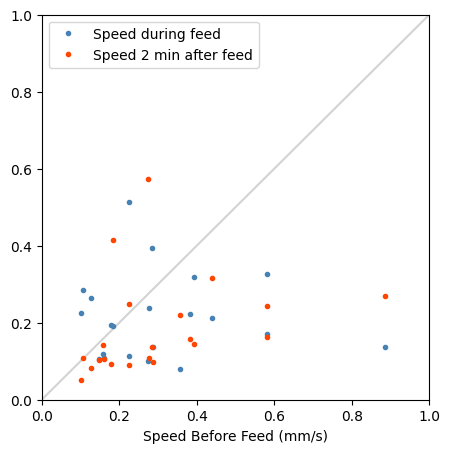

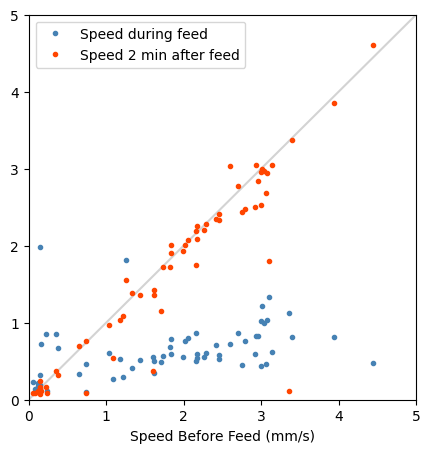

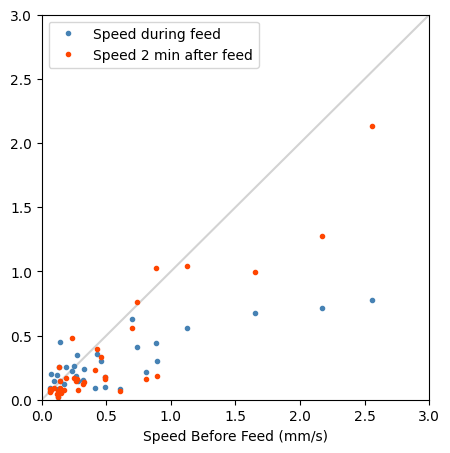

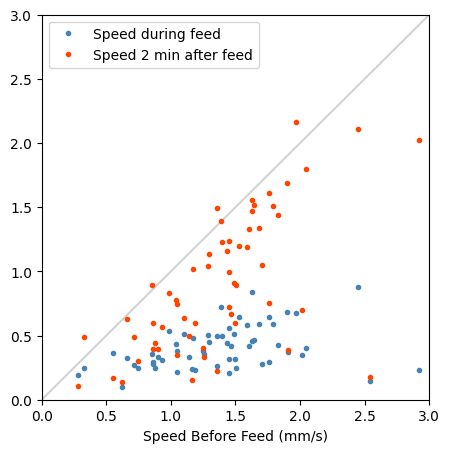

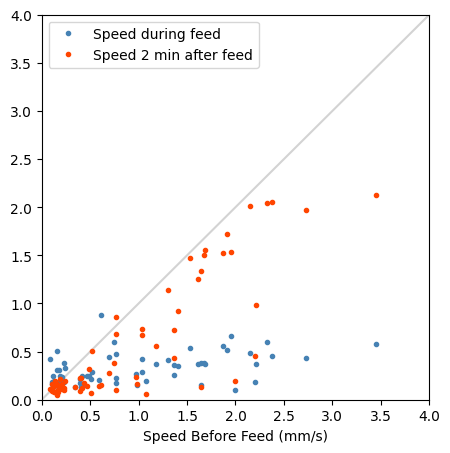

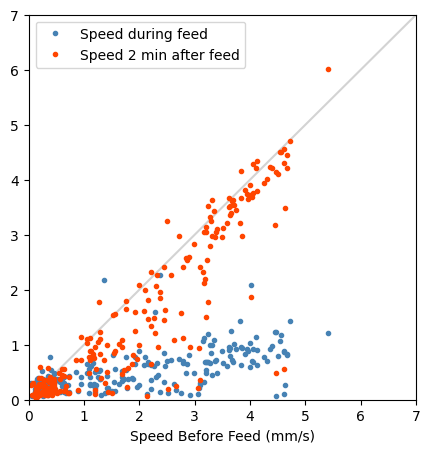

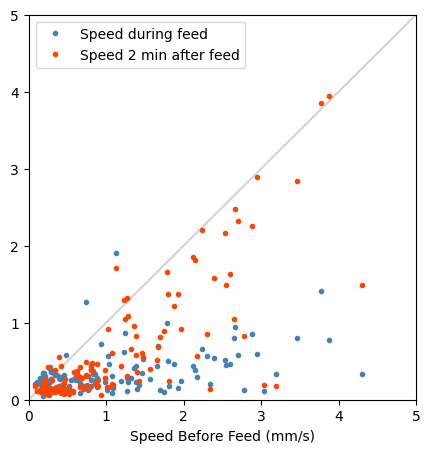

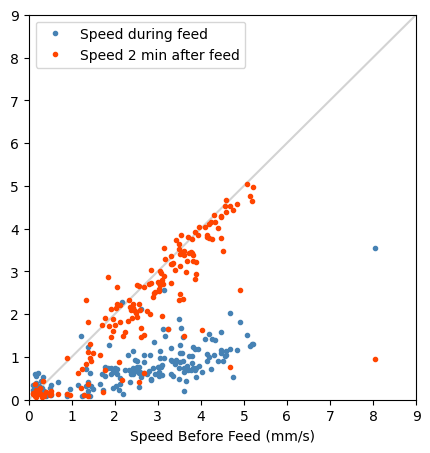

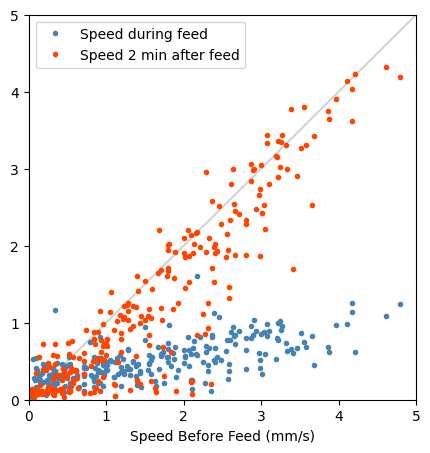

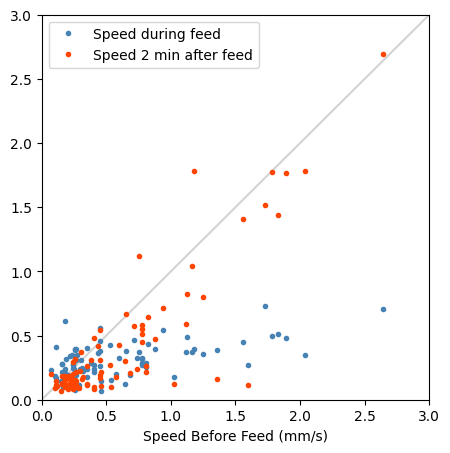

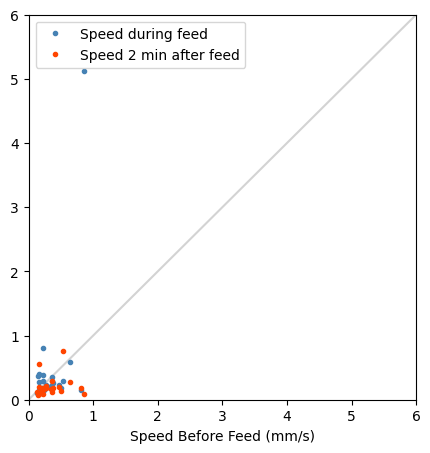

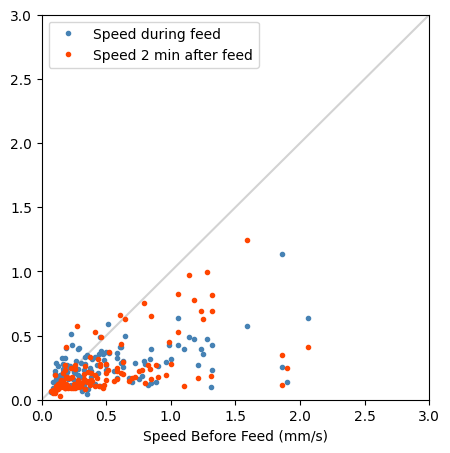

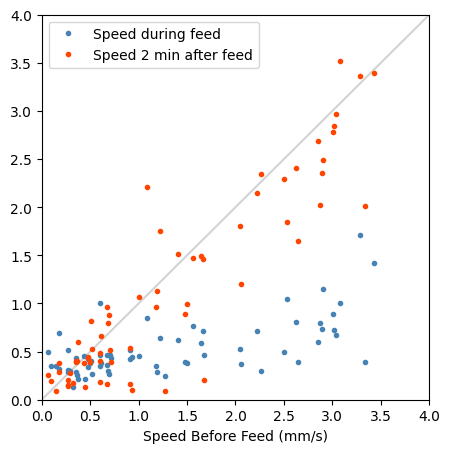

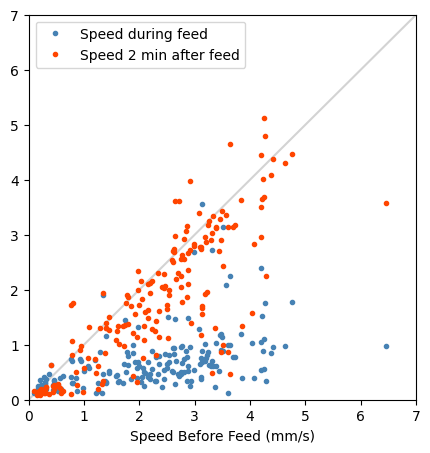

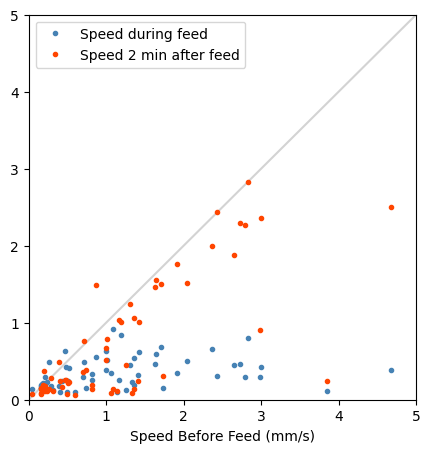

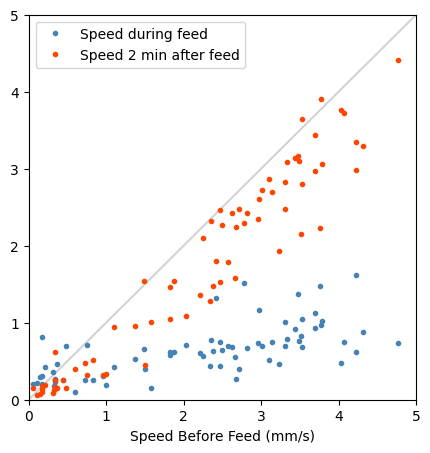

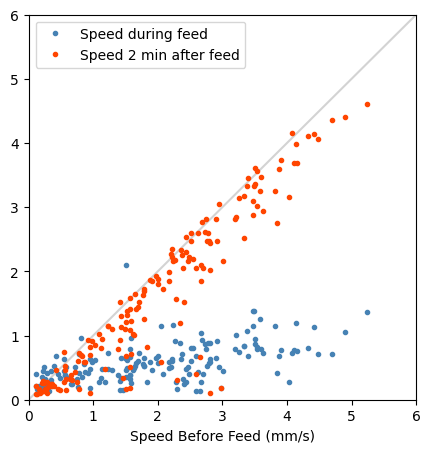

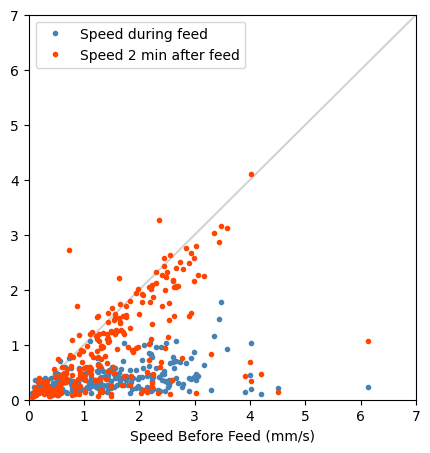

In [ ]:
datapaths = [
    # 'RNAi', 
    'Known Feeding Review', 
    'Main 5HT', 
    'Novel VNC Splits', 'Intersection', 
             'WT'
]
pickle_path = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/pickles/'
for i in datapaths:
    preprocessData('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/'+ i,
               pickle_path) 

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
    preprocessData('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/'
                   + 'Known Feeding Review',pickle_path) 
